# Masterclass Qiskit — 0 • Introduction à l'information quantique & Qiskit

Objectifs pédagogiques (≈30–40 min) :
- Installer et configurer Qiskit (local) et comprendre la logique des modules.
- Manipuler les objets clés : `QuantumCircuit`, `QuantumRegister`, `ClassicalRegister`.
- Simuler un circuit (statevector & qasm) et mesurer.
- Lire un diagramme de circuit et interpréter les résultats.

Prérequis : Python de base (variables, fonctions), un peu de linéaire (vecteurs).

## 1. Mise en place

> Si Qiskit n'est pas installé sur votre machine, exécuter la cellule suivante

In [126]:
# Vérifier la version de Qiskit installée
import sys, platform
print("Python:", sys.version.split()[0], "| OS:", platform.platform())

import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

Python: 3.11.2 | OS: Linux-6.1.0-40-amd64-x86_64-with-glibc2.36


## 2. Premier circuit : un seul qubit, aucune porte
- On crée un circuit avec 1 qubit + 1 bit classique, on mesure.
- Attendu : toujours `0`.

In [127]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1, 1)  # Crée un circuit quantique avec un qubit et un bit
qc.measure(0, 0)  # Effectue une mesure du qubit sur le bit

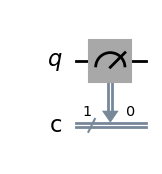

In [128]:
qc.draw('mpl')  # Affiche le circuit

In [129]:
qc.draw('text') # Si l'intruction précédente ne fonctionne pas

┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

In [130]:
# Lancer l'exécution du circuit sur un simulateur
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'0': 1024}

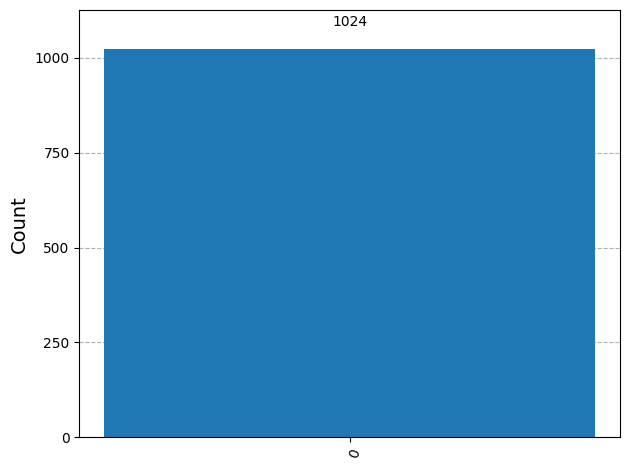

In [131]:
# Afficher l'histogramme
plot_histogram(counts)

### Pause pédagogique
- Pourquoi obtenons-nous toujours `0` ?
- Qubit initialisé en |0⟩, mesure en base Z → résultat déterministe.

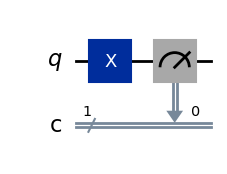

In [132]:
qc_exemple = QuantumCircuit(1, 1)
qc_exemple.x(0)
qc_exemple.measure(0, 0)
qc_exemple.draw("mpl")

In [133]:
# Lancer l'exécution du circuit sur un simulateur
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc_exemple, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'1': 1024}

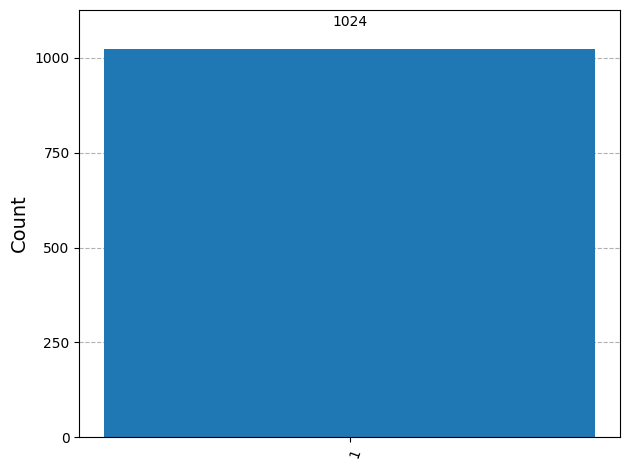

In [134]:
plot_histogram(counts)

## 3. Ajouter une porte Hadamard `H` : naissance de la superposition

### Quel est le résultat attendu ?

In [135]:
# Créer un nouveau circuit appelé qc2
qc2 = QuantumCircuit(1, 1)
# Placer une porte Hadamard sur le premier qubit à l'aide de la fonction h() en précisant le qubit visé entre parenthèses
qc2.h(0)
# Ajouter une mesure du qubit
qc2.measure(0, 0)

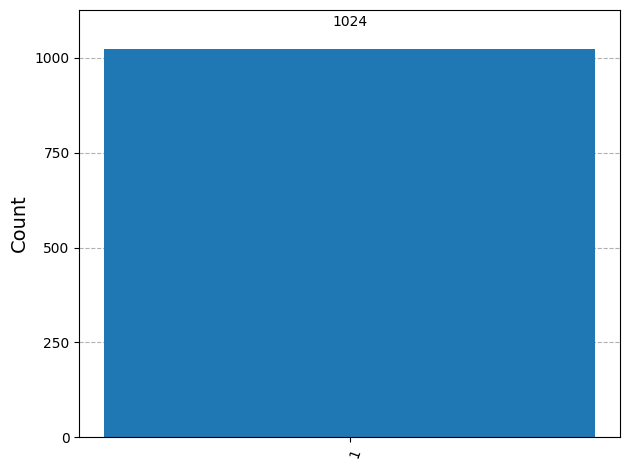

In [136]:
# Afficher l'histogramme
plot_histogram(counts)

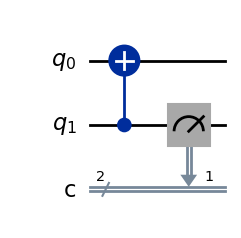

In [137]:
qc2_exemple = QuantumCircuit(2, 2)
qc2_exemple.cx(1, 0)
qc2_exemple.measure(1, 1)
qc2_exemple.draw('mpl')

In [138]:
# Lancer l'exécution du circuit sur un simulateur
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc2_exemple, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'00': 1024}

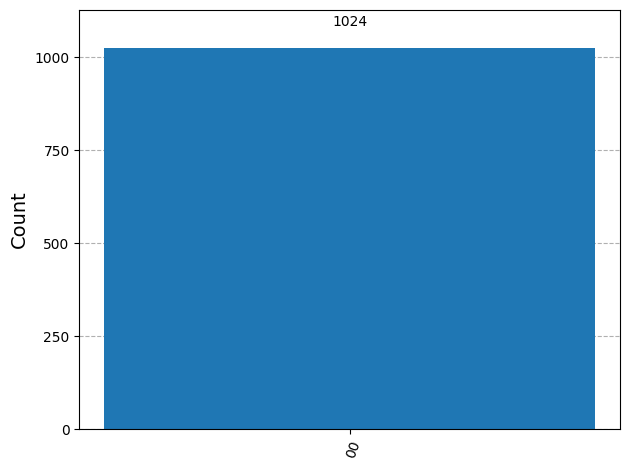

In [139]:
plot_histogram(counts)

In [140]:
# Lancer l'exécution du circuit sur un simulateur
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc2, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'1': 514, '0': 510}

### 4. Observer l'état avec le simulateur `Statevector`

In [141]:
# Créer un circuit avec un qubit nommé qc3
# Ajouter une porte Hadamard
# Afficher le circuit

**Checkpoint**  
- Vous savez créer un circuit, le simuler, mesurer, visualiser les résultats.

## 5. Exercices guidés (avec solutions plus bas)

1. **X sur |0⟩** : créer un circuit 1-qubit qui appliquer `X` et mesurer. Attendu : ≈100% `1`.
2. **H suivi de X** : `H` puis `X`, prédire la distribution avant de l'exécuter.
3. **Personnaliser les `shots`** : tester 50, 500, 5000. Quels sont les effets sur les fluctuations statistiques ?

In [142]:
# Zone de réponse Exo 1

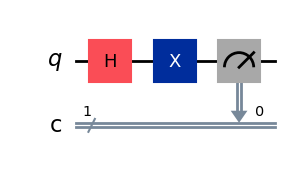

In [153]:
qc3 = QuantumCircuit(1, 1)
qc3.h(0)
qc3.x(0)

qc3.measure(0, 0)
qc3.draw("mpl")

In [154]:
# Lancer l'exécution du circuit sur un simulateur
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc3, backend)
result = backend.run(compiled, shots=5000000).result()
counts3 = result.get_counts()
counts3

{'1': 2498472, '0': 2501528}

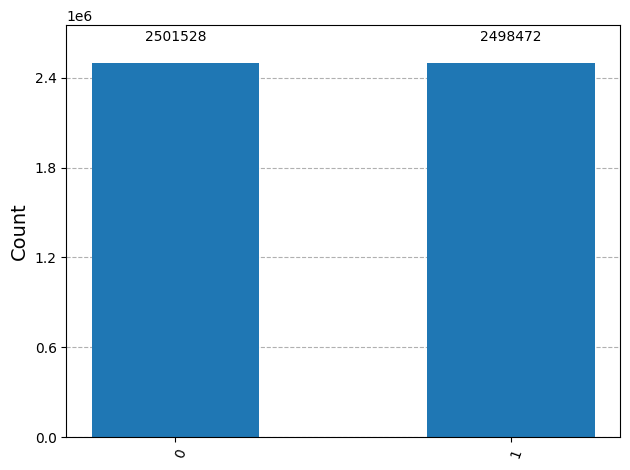

In [155]:
plot_histogram(counts3)

In [146]:
qc3 = QuantumCircuit(1, 1)
qc3.h(0)
qc3.x(0)
sv = Statevector.from_instruction(qc3)
sv.data

array([0.70710678+0.j, 0.70710678+0.j])

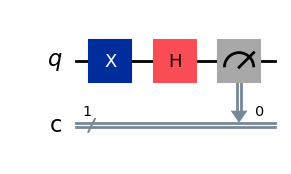

In [147]:
qc4 = QuantumCircuit(1, 1)
qc4.x(0)
qc4.h(0)

qc4.measure(0, 0)
qc4.draw("mpl")

In [148]:
# Lancer l'exécution du circuit sur un simulateur
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc4, backend)
result = backend.run(compiled, shots=1024).result()
counts4 = result.get_counts()
counts4

{'0': 504, '1': 520}

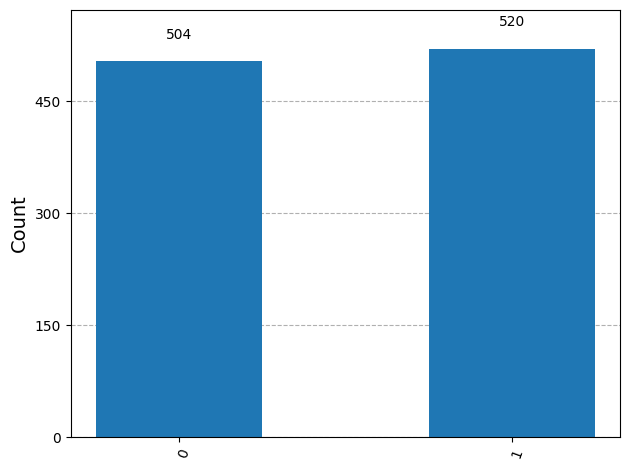

In [149]:
plot_histogram(counts4)

In [151]:
qc4 = QuantumCircuit(1, 1)
qc4.x(0)
qc4.h(0)
sv = Statevector.from_instruction(qc4)
sv.data

array([ 0.70710678+0.j, -0.70710678+0.j])